In [47]:
import json
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
from os import listdir
import re

In [48]:
fig0 = plt.figure(0)

In [49]:
def cmpkey(x, y):
    return int(x)-int(y)

def convert_res_to_points(result_obj, param):
    point_list = []
    for k in sorted(result_obj.keys(), cmp=cmpkey):
        param_val = result_obj[k][param]
        if param_val is None:
            param_val = 0
        point_list.append((int(k), param_val))
    return point_list

def convert_points_to_xy(point_list):
    x = []
    y = []
    for p in point_list:
        x.append(p[0])
        y.append(p[1])
    return x, y
    
def read_result_files(re_rule, param):
    pl_array = []
    filenames = listdir('../data')
    filename_pattern = re.compile(re_rule)
    for filename in filenames:
        if filename_pattern.match(filename):
            print filename
            result_obj = json.load(open('../data/'+filename, 'r'))
            pl = convert_res_to_points(result_obj, param)
            print pl
            pl_array.append(pl)
    return pl_array

def cal_avg_pl(pl_array):
    added_pl_arr = np.array(pl_array[0])
    del pl_array[0]
    pl_arr_np = np.array(pl_array)
    for pl_np in pl_arr_np:
        added_pl_arr += pl_np
    added_pl_arr /= (len(pl_array)+1)
    return added_pl_arr

In [63]:
pl_array10 = read_result_files('results\-sleep10\-\d+\.json', 'meanLatencyMs')
avg_pl10 = cal_avg_pl(pl_array10)
print avg_pl10
x10, y10 = convert_points_to_xy(avg_pl10)

pl_array5 = read_result_files('results\-sleep5\-\d+\.json', 'meanLatencyMs')
avg_pl5 = cal_avg_pl(pl_array5)
print avg_pl5
x5, y5 = convert_points_to_xy(avg_pl5)

plt.ylabel('Mean Latency')
plt.xlim(0, 600)
plt.ylim(0, 8000)

results-sleep10-6.json
[(20, 6.7), (40, 7.6), (60, 7.7), (80, 9), (100, 8.9), (120, 12.9), (140, 17.7), (160, 34.5), (180, 240.8), (200, 318.8), (220, 700.5), (240, 1052.5), (260, 1498.8), (280, 1629.1), (300, 2444.4), (320, 5205.2), (340, 2601.2), (360, 2297.6), (380, 4416.6), (400, 3228.8), (420, 4055.9), (440, 5317.3), (460, 9134.6), (480, 4412.6), (500, 0), (520, 0)]
results-sleep10-1.json
[(20, 10.6), (40, 100.4), (60, 7.7), (80, 8), (100, 10.3), (120, 13.3), (140, 21.6), (160, 187.2), (180, 100), (200, 319), (220, 690.1), (240, 997.2), (260, 1483), (280, 1561.8), (300, 1757.6), (320, 2558.2), (340, 2102.9), (360, 3612.2), (380, 2742.1), (400, 4122.6), (420, 6196.8), (440, 8986), (460, 5045.9), (480, 5926.8), (500, 0), (520, 0)]
results-sleep10-10.json
[(20, 8.5), (40, 5.8), (60, 8.2), (80, 8.5), (100, 8), (120, 12.2), (140, 24.1), (160, 43.4), (180, 98.9), (200, 407.6), (220, 918), (240, 1115.8), (260, 1661.3), (280, 1896.7), (300, 1925.1), (320, 2176.3), (340, 2755.7), (360, 262

(0, 8000)

In [64]:
plt.plot(x10, y10)
plt.plot(x5, y5, '-*')

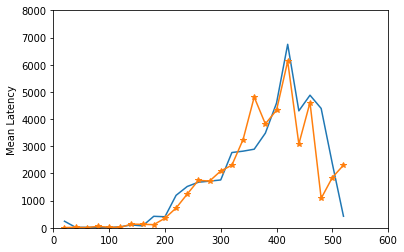

In [65]:
plt.show()

In [53]:
plt.savefig('ripple8_rps_latency.png')

In [54]:
plt.close(0)

In [55]:
fig1 = plt.figure(1)

In [61]:
pl_array10 = read_result_files('results\-sleep10\-\d+\.json', 'totalRequests')
avg_pl10 = cal_avg_pl(pl_array10)
print avg_pl10
x10, y10 = convert_points_to_xy(avg_pl10)

pl_array5 = read_result_files('results\-sleep5\-\d+\.json', 'totalRequests')
avg_pl5 = cal_avg_pl(pl_array5)
print avg_pl5
x5, y5 = convert_points_to_xy(avg_pl5)

plt.xlabel('RPS')
plt.ylabel('Total successful requests')
plt.xlim(0, 600)
plt.ylim(0, 7000)

plt.plot(x5, y5, '-.')
plt.plot(x10, y10, '-')

results-sleep10-6.json
[(20, 191), (40, 383), (60, 560), (80, 799), (100, 926), (120, 1090), (140, 1279), (160, 1439), (180, 1655), (200, 1638), (220, 1650), (240, 1565), (260, 1632), (280, 1693), (300, 1399), (320, 975), (340, 1446), (360, 1502), (380, 1169), (400, 1222), (420, 1627), (440, 1434), (460, 2), (480, 1), (500, 0), (520, 0)]
results-sleep10-1.json
[(20, 192), (40, 383), (60, 578), (80, 775), (100, 923), (120, 1139), (140, 1381), (160, 1271), (180, 1674), (200, 1819), (220, 1593), (240, 1344), (260, 1645), (280, 1769), (300, 1553), (320, 1543), (340, 1255), (360, 1275), (380, 1517), (400, 1259), (420, 301), (440, 80), (460, 901), (480, 1523), (500, 0), (520, 0)]
results-sleep10-10.json
[(20, 186), (40, 391), (60, 587), (80, 755), (100, 956), (120, 1158), (140, 1347), (160, 1536), (180, 1612), (200, 1633), (220, 1770), (240, 1761), (260, 1503), (280, 1664), (300, 1720), (320, 1532), (340, 1537), (360, 1596), (380, 1368), (400, 556), (420, 304), (440, 768), (460, 0), (480, 20

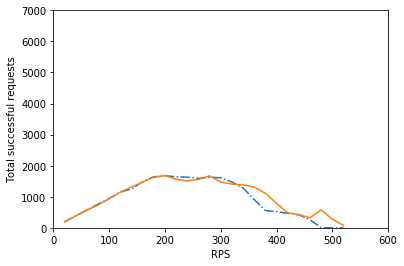

In [62]:
plt.show()
plt.savefig('ripple8_rps_successfulreqs.png')